LAB-5 
Solution-1 

{('A', 'B'): Text(1.0, 7.0, '2'),
 ('A', 'E'): Text(2.5, 6.5, '1'),
 ('A', 'C'): Text(0.5, 5.5, '2'),
 ('E', 'I'): Text(6.0, 7.5, '3'),
 ('E', 'F'): Text(6.0, 5.5, '2'),
 ('J', 'G'): Text(9.0, 6.5, '2'),
 ('D', 'F'): Text(5.0, 3.5, '4'),
 ('D', 'H'): Text(5.0, 2.0, '3'),
 ('H', 'J'): Text(8.0, 3.5, '4'),
 ('I', 'F'): Text(7.0, 6.0, '1'),
 ('I', 'G'): Text(8.0, 7.5, '2'),
 ('F', 'G'): Text(8.0, 5.5, '2'),
 ('F', 'H'): Text(7.0, 2.5, '5'),
 ('B', 'E'): Text(3.5, 7.5, '2'),
 ('B', 'I'): Text(4.5, 8.0, '1'),
 ('C', 'F'): Text(4.0, 4.5, '1'),
 ('C', 'D'): Text(2.0, 4.0, '2')}

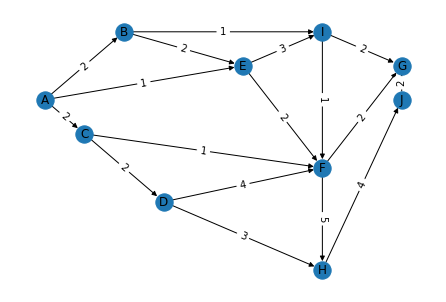

In [ ]:
import networkx as nx
import numpy as np
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

V = {'A','B','C','D','E','F', 'G', 'H', 'I', 'J'}
E = [('A','B',2),('A','E',1),('A','C',2),('B','E',2),('B','I',1),('E','I',3),
    
    ('E','F',2),('C','F',1),('C','D',2),('D','F',4),('D','H',3),('I','F',1),
    ('I','G',2),('F','G',2),('F','H',5),('H','J',4),('J','G',2)

]

pos = {
    'A':[0,6],'B':[2,8],'C':[1,5],'D':[3,3],'E':[5,7],'F':[7,4], 'G':[9,7], 'H':[7,1],
    'I':[7,8], 'J':[9,6]
}

G = nx.DiGraph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

#G.nodes
#G.edges

weights = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos=pos,with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weights)

# **Initialize the Graph**

In [ ]:
# UCS Algorithm
from queue import PriorityQueue

import sys
MAX_INT = sys.maxsize

class Stack:
  def __init__(self):
    self.frontier = []
  def add(self, node):
    self.frontier.append(node)
  def isEmpty(self):
    return len(self.frontier) == 0
  def remove(self):
    if self.isEmpty():
        return None
    else:
        node = self.frontier[-1]
        self.frontier = self.frontier[:-1]
        return node


  def print_frontier(self):
      print(self.frontier)

class Queue(Stack):
    def remove(self):
        if self.isEmpty():
            # raise Exception("Empty Queue")
            return None
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

class Graph:
    def __init__(self):
        self.node = {}
    def add_node(self, from_node):
        self.node[from_node] = []
    def add_edge(self, from_node, to_node, weight):
        self.node[from_node].append((to_node, weight))

    def print_graph(self):
        print(self.node)
    
    def h(self, n):
        H = {
            'A': 28,
            'B': 22,
            'C': 19,
            'D': 16,
            'E': 14,
            'F': 10,
            'G': 0,
            'H': 9,
            'I': 8,
            'J': 6
        }
 
        return H[n]
    def UCS(self, start, end):
        if start not in self.node:
            raise Exception("No such node")
        frontier = PriorityQueue()
        distance = {}

        for from_node, weighted_edge in self.node.items():
            for to_node_and_edge in weighted_edge:
                node, weight = to_node_and_edge
                distance[(from_node, node)] = MAX_INT
        
        frontier.put((0, start))
        visited = []
        previous = []
        previous.append(end)
        parent= {}
        while True:
            if frontier.empty():
                raise Exception("Empty Queue")
            
            cost, current_node = frontier.get()
            visited.append(current_node)
            if current_node == end:
                break

            for to_node, weight in self.node[current_node]:
                if to_node in visited:
                    continue
                newDistance = cost + weight
                if(newDistance < distance[(current_node, to_node)]):
                    distance[(current_node, to_node)] = newDistance
                    frontier.put((newDistance, to_node))
                    parent[to_node] = current_node
            

       
      
        # optimal path
        prev = parent[end]
        second_child = None
        opt_pathcost = distance[(prev, end)]
        optimal_par_weight = MAX_INT
        while prev is not None:
            if prev is not start:
                previous.append(prev)
                for shortest_distant_parent, child in distance:
                    if child == prev and distance[(shortest_distant_parent, child)] < optimal_par_weight:
                         
                        optimal_par_weight = distance[(shortest_distant_parent, child)]
                        prev = shortest_distant_parent
                        second_child = prev
           
            else:
                # previous.append(prev)

                previous.append(start)
                previous.reverse()
                print(f" Shortest path From Start to End for UCS: {previous}")
                print(f"optimal cost for UCS: {opt_pathcost}")
                return

    def GBFS(self, start, goal):
        if start not in self.node:
            raise Exception("No such node")
        OPEN = PriorityQueue()
        distance = {}

        for from_node, weighted_edge in self.node.items():
            for to_node_and_edge in weighted_edge:
                node, weight = to_node_and_edge
                distance[(from_node, node)] = MAX_INT
        
        OPEN.put((self.h(start), start))
        visited = []
        previous = []
        previous.append(goal)
        parent= {}
        optimal_cost = 0
        while True:
            if OPEN.empty():
                raise Exception("empty queue")
            h_score, current_node = OPEN.get()
            visited.append(current_node)
            if current_node == goal:
                print(f"Shortest Path for GBFS {visited}")
                break
            lowest_hscore = MAX_INT
            for to_node, weight in self.node[current_node]:
                if to_node in visited:
                    continue
                if lowest_hscore > self.h(to_node):
                    lowest_hscore = self.h(to_node)
                    distance[(current_node, to_node)] = lowest_hscore
                    OPEN.put((lowest_hscore, to_node))
            print(f"lowest hscore :{lowest_hscore}")
            optimal_cost += lowest_hscore
        
        # print(distance)
        print(f"optimal_cost for GBFS: {optimal_cost}")

    def A_star(self, start, goal):
        if start not in self.node:
            raise Exception("No such node")
        OPEN = []
        distance = {}

        for from_node, weighted_edge in self.node.items():
            for to_node_and_edge in weighted_edge:
                node, weight = to_node_and_edge
                distance[(from_node, node)] = MAX_INT
        
        OPEN.append((0,0,start))
        CLOSE = []
        previous = []
        previous.append(goal)
        parent= {}
        optimal_cost = 0
        goal_found = 0
        while True:
            if len(OPEN) == 0:
                raise Exception("Empty Queue")
            print(f"OPEN list: {OPEN}")
            
            least_fscore = MAX_INT
            for f, c, node in OPEN:
                if node == start:
                    least_fscored_tuple = (f,c,node)
                if least_fscore > f:
                    least_fscore = f
                    least_fscored_tuple = (least_fscore,c, node)
            
            print(least_fscored_tuple)
            f_score, cost, current_node = least_fscored_tuple
            OPEN.remove(least_fscored_tuple)
            for to_node, weight in self.node[current_node]:
                if to_node == goal:
                    goal_found = 1
                    optimal_cost = cost + weight + self.h(to_node)
                    CLOSE.append(current_node)
                    CLOSE.append(goal)
                    print(f"Shortest path from start to Goal (CLOSE list): {CLOSE}")
                    
                    break
                if to_node in CLOSE:
                    continue
                
                newDistance = cost + weight + self.h(to_node)
                act_path_cost = cost + weight
                if newDistance < distance[(current_node, to_node)]:
                    distance[(current_node, to_node)] = newDistance
                    OPEN.append((newDistance,act_path_cost, to_node))
            if goal_found == 1:
                print(f"Optimal path cost: {optimal_cost}")
                break
                
            CLOSE.append(current_node)
            
            print(f"distance table: {distance}")


    


g = Graph()
g.add_node("A")
g.add_node("B")
g.add_node("C")
g.add_node("D")
g.add_node("E")
g.add_node("F")
g.add_node("G")
g.add_node("H")
g.add_node("I")
g.add_node("J")

g.add_edge("A", "B", 2 )
g.add_edge("A", "C", 2 )
g.add_edge("A", "E", 1 )
g.add_edge("B", "E", 2 )
g.add_edge("B", "I", 1 )
g.add_edge("C", "F", 1 )
g.add_edge("C", "D", 2 )
g.add_edge("D", "F", 4 )
g.add_edge("D", "H", 3 )
g.add_edge("F", "H", 5 )
g.add_edge("F", "G", 2 )
g.add_edge("I", "G", 2 )
g.add_edge("F", "F", 1 )
g.add_edge("E", "F", 2 )
g.add_edge("E", "I", 3 )
g.add_edge("H", "J", 4)
g.add_edge("J", "G", 2)

# g.print_graph()

g.UCS("A", "G")
g.GBFS("A", "G")
g.A_star("A", "G")

    
            
        
    

    
    
    
    





 Shortest path From Start to End for UCS: ['A', 'B', 'I', 'G']
optimal cost for UCS: 5
lowest hscore :14
lowest hscore :8
lowest hscore :0
Shortest Path for GBFS ['A', 'E', 'I', 'G']
optimal_cost for GBFS: 22
OPEN list: [(0, 0, 'A')]
(0, 0, 'A')
distance table: {('A', 'B'): 24, ('A', 'C'): 21, ('A', 'E'): 15, ('B', 'E'): 9223372036854775807, ('B', 'I'): 9223372036854775807, ('C', 'F'): 9223372036854775807, ('C', 'D'): 9223372036854775807, ('D', 'F'): 9223372036854775807, ('D', 'H'): 9223372036854775807, ('E', 'F'): 9223372036854775807, ('E', 'I'): 9223372036854775807, ('F', 'H'): 9223372036854775807, ('F', 'G'): 9223372036854775807, ('F', 'F'): 9223372036854775807, ('H', 'J'): 9223372036854775807, ('I', 'G'): 9223372036854775807, ('J', 'G'): 9223372036854775807}
OPEN list: [(24, 2, 'B'), (21, 2, 'C'), (15, 1, 'E')]
(15, 1, 'E')
distance table: {('A', 'B'): 24, ('A', 'C'): 21, ('A', 'E'): 15, ('B', 'E'): 9223372036854775807, ('B', 'I'): 9223372036854775807, ('C', 'F'): 92233720368547758